In [1]:
import numpy as np
from scipy.special import comb
from matplotlib import pyplot as plt

# Geometric distribution

In [2]:
# Geometric distribution
def geometric(p, k):
    cdf = []
    pdf = []
    p_temp = 0
    
    # Calculate the pdf
    for i in range(1, (k+1)):
        p_temp = ((1 - p)**(i-1))*p
        pdf.append(p_temp)
    
    # Calculate the cdf
    for i in range(1, (k+1)):
        p_temp = 1 - (1 - p)**(i)
        cdf.append(p_temp)
    
    return [cdf, pdf]

Test Geometric distribution

In [3]:
print(geometric(0.2, 7))

[[0.19999999999999996, 0.3599999999999999, 0.4879999999999999, 0.5903999999999999, 0.6723199999999999, 0.7378559999999998, 0.7902847999999999], [0.2, 0.16000000000000003, 0.12800000000000003, 0.10240000000000003, 0.08192000000000002, 0.06553600000000002, 0.052428800000000025]]


# Binomial distribution

In [4]:
def binomial(N, p, k):
    cdf = []
    pdf = []
    p_temp = 0
    
    # Calculate the pdf
    for i in range(0, (k+1)):
        p_temp = comb(N, i)*(p**i)*((1-p)**(N-i))
        pdf.append(p_temp)
    
    # Calculate the cdf
    for i in range(0, (k+1)):
        p_temp = sum(pdf[0: i+1])
        cdf.append(p_temp)
    
    return [cdf, pdf]

Test Binomial distribution

In [5]:
print(binomial(20, 0.2, 7))

[[0.011529215046068483, 0.0691752902764109, 0.20608471894847413, 0.41144886195656905, 0.6296482639026698, 0.8042077854595504, 0.9133074864326008, 0.967857336919126], [0.011529215046068483, 0.05764607523034241, 0.13690942867206324, 0.20536414300809488, 0.21819940194610077, 0.17455952155688062, 0.1090997009730504, 0.05454985048652519]]


# Poisson distribution

In [6]:
# Calculate factor
def factor(n):
    temp = 1    
    if n == 0:
        temp = 1
    elif n == 1:
        temp = 1
    else:
        for i in range(2, n+1):
            temp = temp*i
    
    return temp

In [7]:
print(factor(2))

2


In [8]:
def poisson(lamb, T, k):
    cdf = []
    pdf = []
    p_temp = 0
    
    # Calculate the pdf
    for i in range(0, (k+1)):
        p_temp = ((lamb*T)**k)*np.exp(-lamb*T)/factor(i)
        pdf.append(p_temp)
    
    # Calculate the cdf
    for i in range(0, (k+1)):
        p_temp = sum(pdf[0: i+1])
        cdf.append(p_temp)
    
    return [cdf, pdf]

Test Poisson distribution

In [9]:
print(poisson(0.1, 10, 7))

[[0.36787944117144233, 0.7357588823428847, 0.9196986029286058, 0.9810118431238463, 0.9963401531726563, 0.9994058151824183, 0.999916758850712, 0.9999897508033253], [0.36787944117144233, 0.36787944117144233, 0.18393972058572117, 0.06131324019524039, 0.015328310048810098, 0.0030656620097620196, 0.0005109436682936699, 7.299195261338141e-05]]


# Exponential distribution

In [10]:
def exponential(lamb, t, res):
    x = np.linspace(0, t, res)
    pdf = lamb*np.exp(-lamb*x)
    cdf = 1 - np.exp(-lamb*x)
    
    return [cdf, pdf, res, t]

Test Exponential distribution

In [11]:
print(exponential(0.1, 7, 8))

[array([0.        , 0.09516258, 0.18126925, 0.25918178, 0.32967995,
       0.39346934, 0.45118836, 0.5034147 ]), array([0.1       , 0.09048374, 0.08187308, 0.07408182, 0.067032  ,
       0.06065307, 0.05488116, 0.04965853]), 8, 7]


# Plot the discrete distribution

In [12]:
# Plotting descrete distribution function 
def discrete_dist_plot(dist_name, dist_vals):
    cdf = dist_vals[0]
    pdf = dist_vals[1]
    x = np.linspace(0, len(cdf) + 2, 100)
    y = np.linspace(0, 1, 50)
    
    if dist_name == "geometric":
        dist_range1 = list(range(1, len(cdf) + 1))
        dist_range2 = list(range(2, len(cdf) + 2))
    else:
        dist_range1 = list(range(0, len(cdf)))
        dist_range2 = list(range(1, len(cdf) + 1))
    
    print(len(dist_range2))
    
    # Plot cdf
    plt.figure(0)
    if dist_name == "geometric":
        for i in dist_range1:
            plt.plot(x[(x >= i) & (x <= (i+1))], cdf[i-1] + x[(x>=i) & (x<=(i+1))]*0, color='k', lw = 1.2)
    else:
        for i in dist_range1:
            plt.plot(x[(x >= i) & (x <= (i+1))], cdf[i] + x[(x>=i) & (x<=(i+1))]*0, color='k', lw = 1.2)
        
    plt.scatter(dist_range2, cdf, s=30, facecolors='b', edgecolors='k')
    plt.title('CDF of ' + dist_name.capitalize() + ' Distribution')
    plt.ylabel('F(k)')
    plt.xlabel('k')
    plt.xlim([0, 9])
    plt.ylim([0, max(cdf) + 0.2])
    plt.grid(which = 'both', linestyle='--', axis = 'y')
    
    plt.savefig('cdf_' + dist_name + '.png', dpi=150)
    
    # Plot pdf
    plt.figure(1)
    plt.vlines(dist_range1, 0 , pdf, color='k', lw = 1.2)
    plt.scatter(dist_range1, pdf, s=30, facecolors='b', edgecolors='k')
    plt.title('PDF of ' + dist_name.capitalize() + ' Distribution')
    plt.ylabel('f(k)')
    plt.xlabel('k')
    plt.xlim([-0.1, 9])
    plt.ylim([0, max(pdf) + 0.1])
    plt.grid(which = 'both', linestyle='--', axis = 'y')
    
    plt.savefig('pdf_' + dist_name + '.png', dpi=150)
    plt.show()

# Plot the continuous distribution

In [13]:
# Plotting continuous distribution function 
def continuous_dist_plot(dist_name, dist_vals):
    cdf = dist_vals[0]
    pdf = dist_vals[1]
    res = dist_vals[2]
    n = dist_vals[3]
    
    x = np.linspace(0, len(cdf)*n/res, res)
    
    # Plot cdf
    plt.figure(0)
    plt.plot(x, cdf, color='k', lw = 1.2)
    plt.title('CDF of ' + dist_name.capitalize() + ' Distribution')
    plt.ylabel('F(k)')
    plt.xlabel('k')
    plt.xlim([0, 9])
    plt.ylim([0, max(cdf) + 0.2])
    plt.grid(which = 'both', linestyle='--', axis = 'y')
    plt.savefig('cdf_' + dist_name + '.png', dpi=150)
    
    # Plot pdf
    plt.figure(1)
    plt.plot(x, pdf, color='k', lw = 1.2)
    plt.title('PDF of ' + dist_name.capitalize() + ' Distribution')
    plt.ylabel('f(k)')
    plt.xlabel('k')
    plt.xlim([-0.1, 9])
    plt.ylim([0, max(pdf) + 0.1])
    plt.grid(which = 'both', linestyle='--', axis = 'y')
    plt.savefig('pdf_' + dist_name + '.png', dpi=150)
    
    plt.show()

# Plot the CDF and PDF of the following distributions
(a) Geometric distribution with p = 0.2, up to k = 7.

(b) Binomial distribution with p = 0.2 and n = 20, up to k = 7.

(c) Poisson distribution with lambda = 0.1/sec and T = 10, up to k = 7.

(d) Exponential distribution with lambda = 0.1/sec, up to t = 7.

7


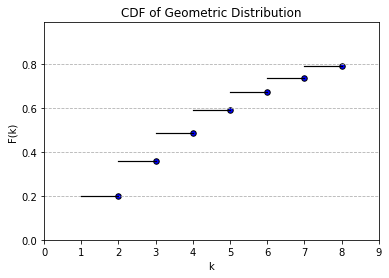

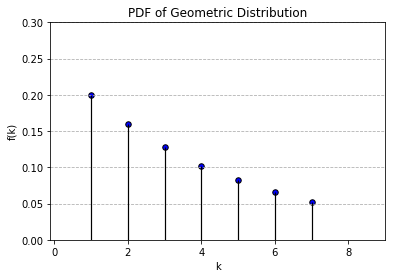

In [14]:
discrete_dist_plot('geometric', geometric(0.2, 7))

8


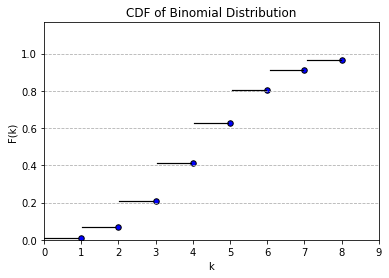

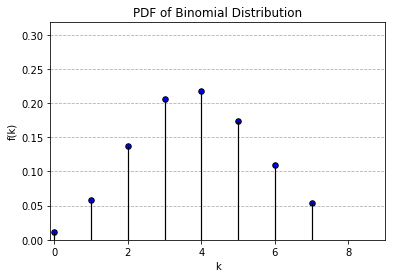

In [15]:
discrete_dist_plot('binomial', binomial(20, 0.2, 7))

8


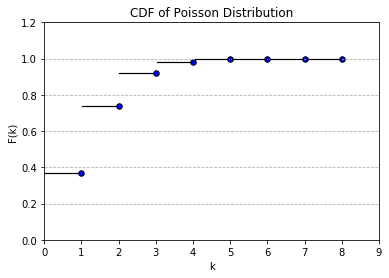

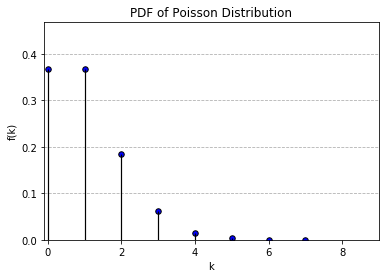

In [16]:
discrete_dist_plot('poisson', poisson(0.1, 10, 7))

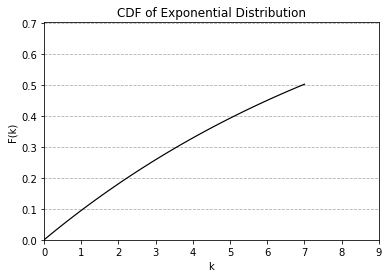

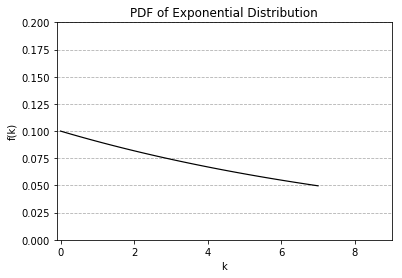

In [17]:
continuous_dist_plot('exponential', exponential(0.1, 7, 45))